In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [26]:
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']


In [27]:

# Usunięcie danych sprzed 1985 roku
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 1985]

# Grupowanie danych po miesiącach
df_grouped_monthly = df.groupby(df['Event.Date'].dt.to_period("M")).size().reset_index(name='Number_of_Accidents')
df_grouped_monthly['Month'] = df_grouped_monthly['Event.Date'].dt.to_timestamp()

# Przeksztalcenie daty na wartość numeryczną
df_grouped_monthly['Month_ordinal'] = df_grouped_monthly['Month'].apply(lambda x: x.toordinal())

In [28]:
# Utworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(df_grouped_monthly[['Month_ordinal']], df_grouped_monthly['Number_of_Accidents'])

# Przewidywanie dla przyszłych miesięcy do 2024 roku
dates_future = pd.date_range(start='1985-01-01', end='2024-12-31', freq='M')
dates_future = dates_future.to_frame(index=False, name='Month')
dates_future['Month_ordinal'] = dates_future['Month'].apply(lambda x: x.toordinal())

predictions_future = model.predict(dates_future[['Month_ordinal']])
dates_future['Predicted_Number_of_Accidents'] = predictions_future


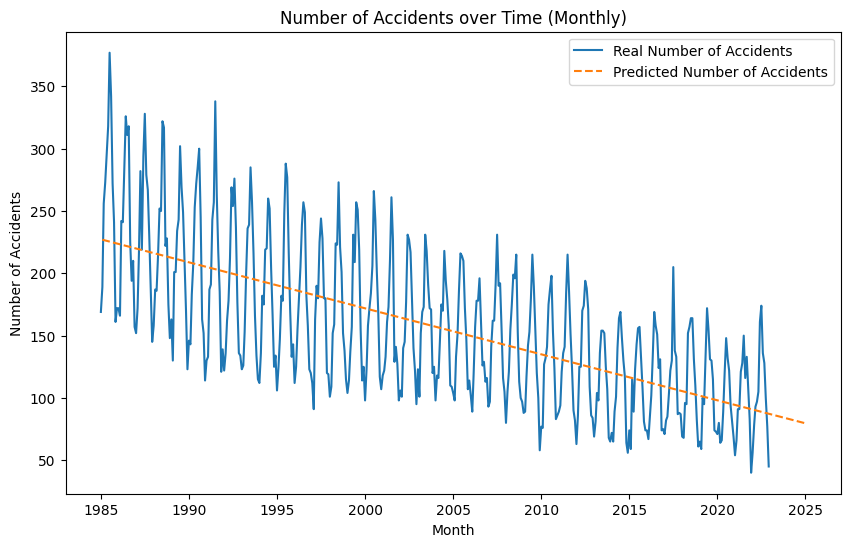

In [29]:
# Wizualizacja wyników
plt.figure(figsize=(10,6))
plt.plot(df_grouped_monthly['Month'], df_grouped_monthly['Number_of_Accidents'], label='Real Number of Accidents')
plt.plot(dates_future['Month'], dates_future['Predicted_Number_of_Accidents'], linestyle='dashed', label='Predicted Number of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents over Time (Monthly)')
plt.legend()
plt.show()
